In [11]:
import os, sys, glob
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pandas as pd

SAMPLES_DIR = 'artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.75-L12-C512-cfdg_ddpm-w=1.2-p=0.1-k=3-dia=2-4/'

In [7]:
all_eval_dir = glob.glob(f"{SAMPLES_DIR}/**/*.csv", recursive=True)

In [21]:
eval_table1 = pd.read_csv(all_eval_dir[0])
eval_table2 = pd.read_csv(all_eval_dir[1])
pd.concat([eval_table1, eval_table2])

,Unnamed: 0,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.vel_cor,asynchrony_feature.delta,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
0,label_dev(percent),5.711173,-0.674300,0.818161,2.485144,-0.996703,4.050413,0.189463,0.298399
1,source_dev(percent),-2.973796,-1.615850,-2.691251,4.058604,18.378878,8.012648,-0.135545,0.161527
2,pred-label(KL),0.411449,0.180833,0.120295,0.051752,0.195780,0.195815,0.429953,1.947636
3,pred-source(KL),0.429895,0.019825,0.008998,0.017494,9.695562,0.212314,0.106675,4.716876
4,label-source(KL),0.086130,0.250233,0.106317,0.021858,4.087972,0.019747,0.079503,0.734596
5,pred-label(cor),0.269536,0.239856,0.288783,0.293500,-0.656213,0.289691,0.367281,0.632668
6,pred-source(cor),0.144109,-0.158678,-0.309851,0.181703,-0.581883,0.226088,0.050389,0.154605
7,label-source(cor),0.330365,0.010054,-0.022419,-0.126056,0.647519,0.254846,0.061747,0.116760
0,label_dev(percent),-4.484997,0.554687,-1.159653,4.173386,9.527837,2.837127,-0.561389,0.442212
1,source_dev(percent),-3.323939,-0.784418,-0.869403,0.800420,-1.642311,1.914049,-0.606536,0.357657


In [20]:
pd.concat([eval_table1, eval_table2]).groupby(level=0).mean()

,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.vel_cor,asynchrony_feature.delta,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
0,0.613088,-0.059806,-0.170746,3.329265,4.265567,3.443770,-0.185963,0.370306
1,-3.148868,-1.200134,-1.780327,2.429512,8.368284,4.963349,-0.371040,0.259592
2,0.275985,0.110159,0.072780,0.138625,0.152738,0.303123,0.436864,3.118217
3,0.256337,0.054495,0.038039,0.049712,4.893994,0.322955,0.416981,2.452950
4,0.046371,0.182955,0.092047,0.034697,2.213573,0.020229,0.051420,0.398161
5,0.282736,0.193794,0.159291,0.259775,-0.243234,0.166464,0.319393,0.420285
6,0.159710,-0.004361,-0.006379,0.247316,-0.234661,0.164147,0.103886,0.118238
7,0.441383,0.114571,0.162099,0.342788,0.389909,0.293574,0.151849,0.190808


In [83]:
# print(pd.read_csv(all_eval_dir[128]).isinf())

index_names = pd.read_csv(all_eval_dir[0])['Unnamed: 0']

all_eval_table = [pd.read_csv(eval_csv_path).replace([np.inf, -np.inf], np.nan) for eval_csv_path in all_eval_dir]
all_eval_table = pd.concat([eval_table for eval_table in all_eval_table if (not ((eval_table.isna().any().any())))])
eval_table_mean = all_eval_table.groupby(level=0).mean()
eval_table_mean = eval_table_mean.set_index(index_names)

# print(pd.read_csv(all_eval_dir[7]))


(-2.0, 2.0)

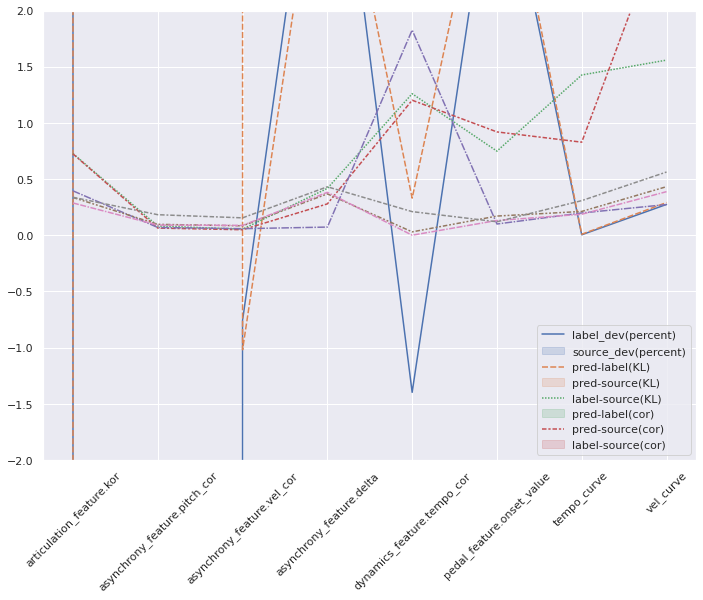

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
sns.lineplot(eval_table_mean.T)

plt.legend(labels=index_names)
plt.xticks(rotation=45)
plt.ylim(-2, 2)